# Chapter 3. 파이썬을 이용한 데이터 분석

## 3.3 matplotlib과 seaborn을 이용한 데이터 시각화

### 3.3.1. 파이썬을 이용한 데이터 시각화

* matplotlib: 그래프를 그리는 표준 라이브러리
* seaborn: matplotlib의 그래프를 더 예쁘게 그리기 위한 라이브러리

### 3.3.2. 시각화를위한 준비

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd

# 표시 자릿수 지정
%precision 3

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

### 3.3.3. pyplot을 이용한 꺾은선 그래프

In [2]:
# 데이터 준비
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([2,3,4,3,5,4,6,7,4,8])

Text(0, 0.5, 'y')

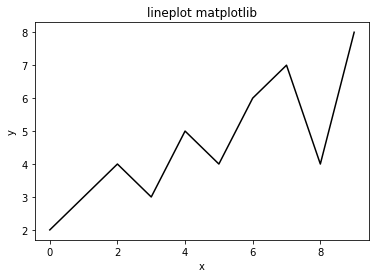

In [3]:
# 꺾은선 그래프
plt.plot(x, y, color = 'black')
plt.title("lineplot matplotlib")
plt.xlabel("x")
plt.ylabel("y")

### 3.3.4. seaborn과 pyplot을 이용한 꺾은선 그래프

In [4]:
import seaborn as sns
sns.set()

Text(0, 0.5, 'y')

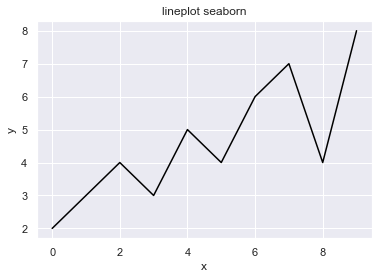

In [5]:
plt.plot(x, y, color = 'black')
plt.title("lineplot seaborn")
plt.xlabel("x")
plt.ylabel("y")

### 3.3.5. seaborn을 이용한 히스토그램

In [6]:
# 데이터 준비: 물고기 몸길이 데이터
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

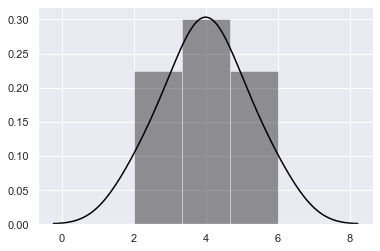

In [7]:
# 히스토그램
sns.distplot(fish_data, color = 'black')

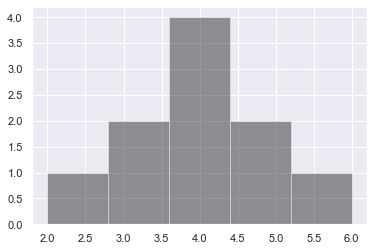

In [8]:
# bins=5: 5개 구간으로 나누어 도수를 구해서 표시
# kde=False: 커널밀도추정하지 않음
sns.distplot(fish_data, bins = 5, 
             color = 'black', kde = False)

### 3.3.6. 커널 밀도 추정에 의한 히스토그램 평활화

커널밀도추정
 * 히스토그램이 가진 문제를 해소
 * 히스토그램 평활화: 구간을 나누는 것이 아니라 히스토그램을 부드러운 선으로 이어나가는 것

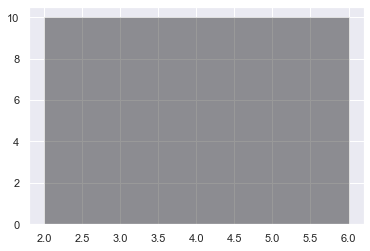

In [9]:
# kde = False, bins=1로 지정 할 경우: 데이터의 특징이 전혀 드러나지 않음
sns.distplot(fish_data, bins = 1, 
             color = 'black', kde = False)

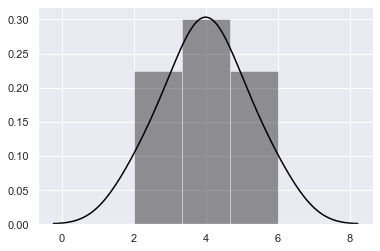

In [10]:
# 커널밀도추정의 결과 표시 : 히스토그램의 면적 합계가 1이 되도록 세로축을 변경
sns.distplot(fish_data, color = 'black')

### 3.3.7. 2변량 데이터에 대한 히스토그램

In [11]:
# 물고기 종류별 몸길이 데이터
fish_multi = pd.read_csv("3-3-2-fish_multi_2.csv")
print(fish_multi)

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A       4
6        A       4
7        A       5
8        A       5
9        A       6
10       B       5
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


In [12]:
# 평균값은 B종 쪽이 큼
print(fish_multi.groupby("species").describe())

        length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0


In [13]:
# 데이터를 물고기의 종류별로 분리
length_a = fish_multi.query('species == "A"')["length"]
length_b = fish_multi.query('species == "B"')["length"]

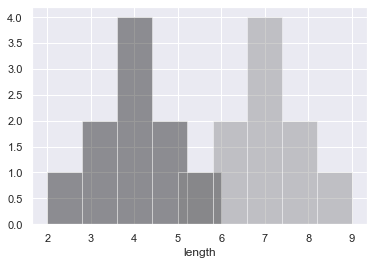

In [25]:
# 2변량 데이터에 대한 히스토그램 : 히스토그램을 그리는 함수를 2번 연속 실행
sns.distplot(length_a, bins = 5, 
             color = 'black', kde = False)
sns.distplot(length_b, bins = 5, 
             color = 'gray', kde = False)

### 3.3.8. 다변량 데이터를 시각화하는 코드 작성
* seaborn을 사용할 경우, 함수 호출 형태

    sns.함수명(
        x = "x축의 열 이름",  
        y = "y축의 열 이름",  
        data = 데이터프레임,  
        그_외의_인수
     )

### 3.3.9. 상자그림(박스플롯)

* 카테고리 변수 x 수치형 변수 조합의 데이터를 표시할 경우(예: 종류별 물고기 몸길이)
* 상자의 중심선: 중앙값
* 상자의 윗단과 아랫단: 75%, 25% 사분위점


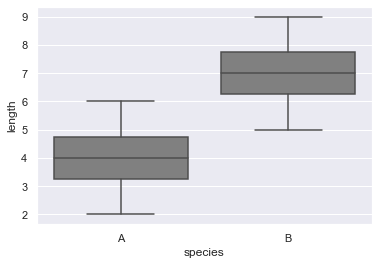

In [15]:
# boxplot
sns.boxplot(x = "species", y  = "length", 
            data = fish_multi, color = 'gray')

In [16]:
# boxplot에 대응하는 값 찾아보기
fish_multi.groupby("species").describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

### 3.3.10. 바이올린 플롯
* 상자대신 커널밀도추정의 결과를 사용
* 어느 부분에 데이터가 집중되어 있는지(도수가 어떤지) 정보가 추가

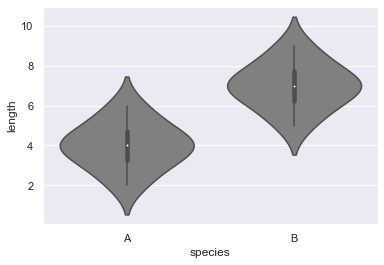

In [17]:
# violinplot
sns.violinplot(x = "species", y  = "length", 
               data = fish_multi, color = 'gray')

### 3.3.11. 막대그래프
* 각 막대의 높이: 평균값 표시
* 에러바: 검은선, 신뢰구간 표시

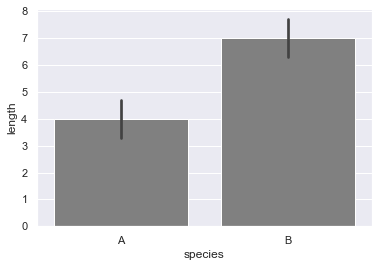

In [18]:
sns.barplot(x = "species", y  = "length", 
            data = fish_multi, color = 'gray')

### 3.3.12. 산포도
* '수치형 변수 x 수치형 변수' 조합의 그래프

In [19]:
cov_data = pd.read_csv("3-2-3-cov.csv")
print(cov_data)

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


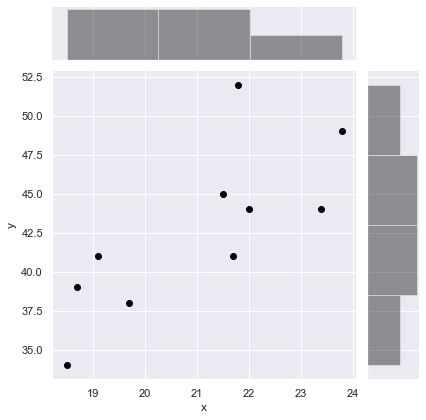

In [20]:
# 산포도 + 히스토그램
sns.jointplot(x = "x", y = "y", 
              data = cov_data, color = 'black')

### 3.3.13. 페어플롯
* 많은 양의 변수를 가지고 있는 데이터를 시각화 할 때 사용

In [21]:
# seaborn 내장 붓꽃의 데이터를 검색
iris = sns.load_dataset("iris")
iris.head(n = 3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


(참고)  
* sepal_length: 꽃받침 길이
* sepal_width: 꽃받침 폭
* petal_length: 꽃잎의 길이
* petal_width: 꽃잎의 폭	
* species: 붓꽃의 종류

In [22]:
# 붓꽃의 종류별 특징 별 평균
iris.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [23]:
?sns.pairplot

Signature:
sns.pairplot(
    data,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=True,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared in the y-axis across a single row and
in the x-axis across a single column. The diagonal Axes are treated
differently, drawing a plot to show the univariate distribution of the data
for the variable in that column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you need more flexi

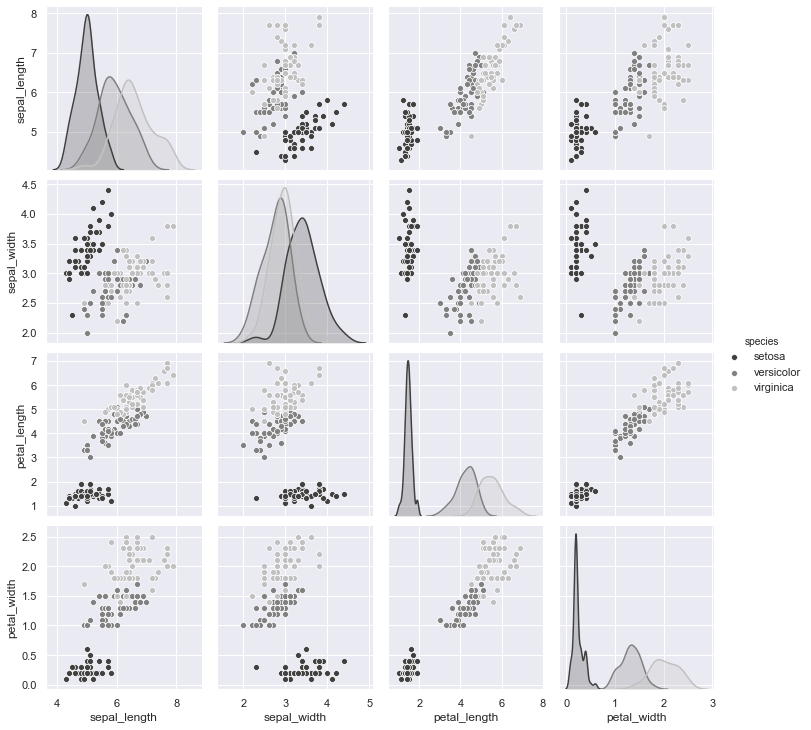

In [24]:
# 페어플롯
# hue: "카테고리의 변수의 열 이름" 지정, 카테고리별로 색을 나누어 그래프를 그림
# 대각선: 히스토그램
sns.pairplot(iris, hue="species", palette='gray')